## EWMA Strategy Evaluation

The exponentially-weighted moving average (EWMA) is a popular momentum indicator used by traders to analyze the trend of the market. Similar to the moving average (MA) indicator, the EWMA considers the previous price data based on a rolling lookback window. The EWMA indicator places greater emphasis on more recent price data compared to the MA model which equally weights each price observation. As a result, the EWMA indicator can be preferred rather than relying on MA as it will react faster towards any significant market moves. 

For this strategy evaluation, we backtested a variety of EWMA strategies by searching for the ideal lookback window parameter. It should be noted that the EWMA strategy is a momentum filter which was added on top of the existing primary filters as suggested by Seahorse. 

The `ewma_calculation.py` file will be used to backtest the strategies as it contains all of the required functions to perform this analysis.

In [1]:
import pandas as pd
import numpy as np
import ewma_calculation as ec
import matplotlib.pyplot as plt

We will begin our optimization by referring to our previous backtest optimisation over 100 intraday intervals for the EWMA lookback window. This was a computationally expensive and time-consuming task hence we will use the existing results to help us refine our optimisation window.

In [2]:
buy = pd.read_csv("full_optimisation_files/buy_annualized_ewma.csv", index_col=0)
sell = pd.read_csv("full_optimisation_files/sell_annualized_ewma.csv", index_col=0)

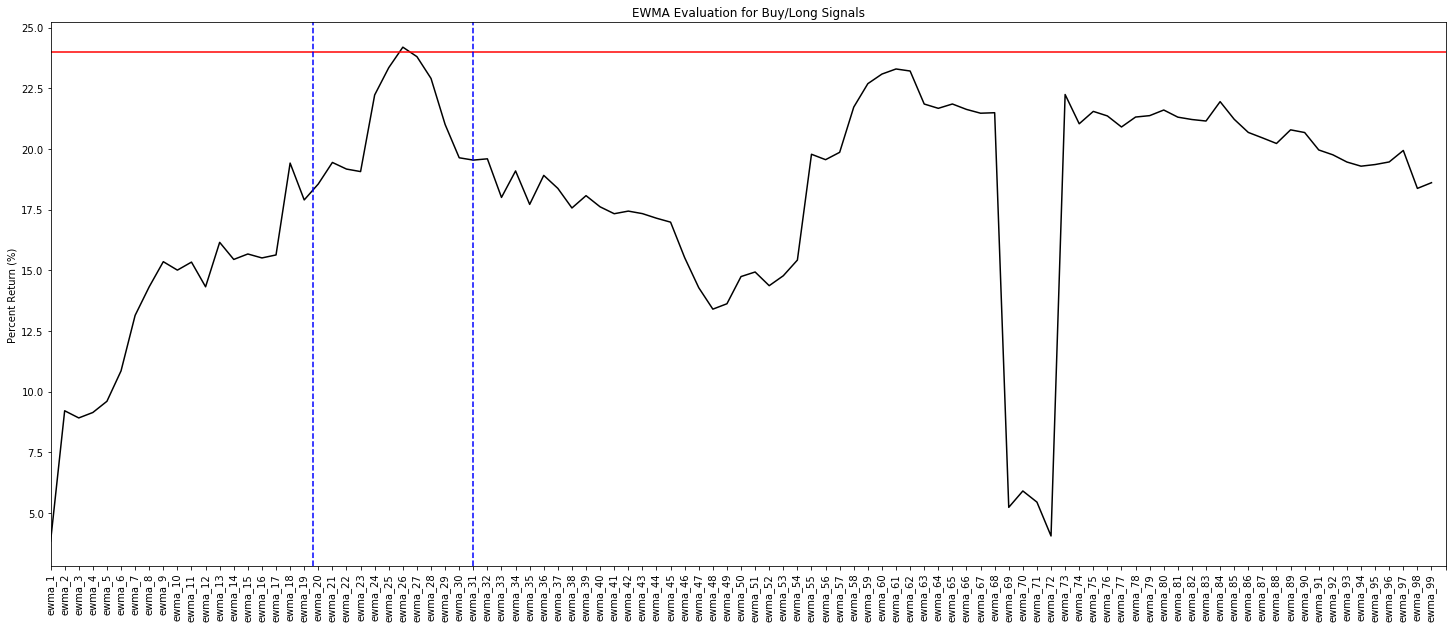

In [3]:
plt.figure(figsize=(25,10))
(buy.mean()*100).plot(color = "black")
plt.xticks(np.arange(0,100,1), buy.columns, rotation = 90)
plt.title("EWMA Evaluation for Buy/Long Signals")
plt.ylabel("Percent Return (%)")

plt.axhline(y = 0.24*100, color = "r")
plt.axvline(x = 6.2 * 3, color = "blue", linestyle = "--")
plt.axvline(x = 10* 3, color = "blue", linestyle = "--")

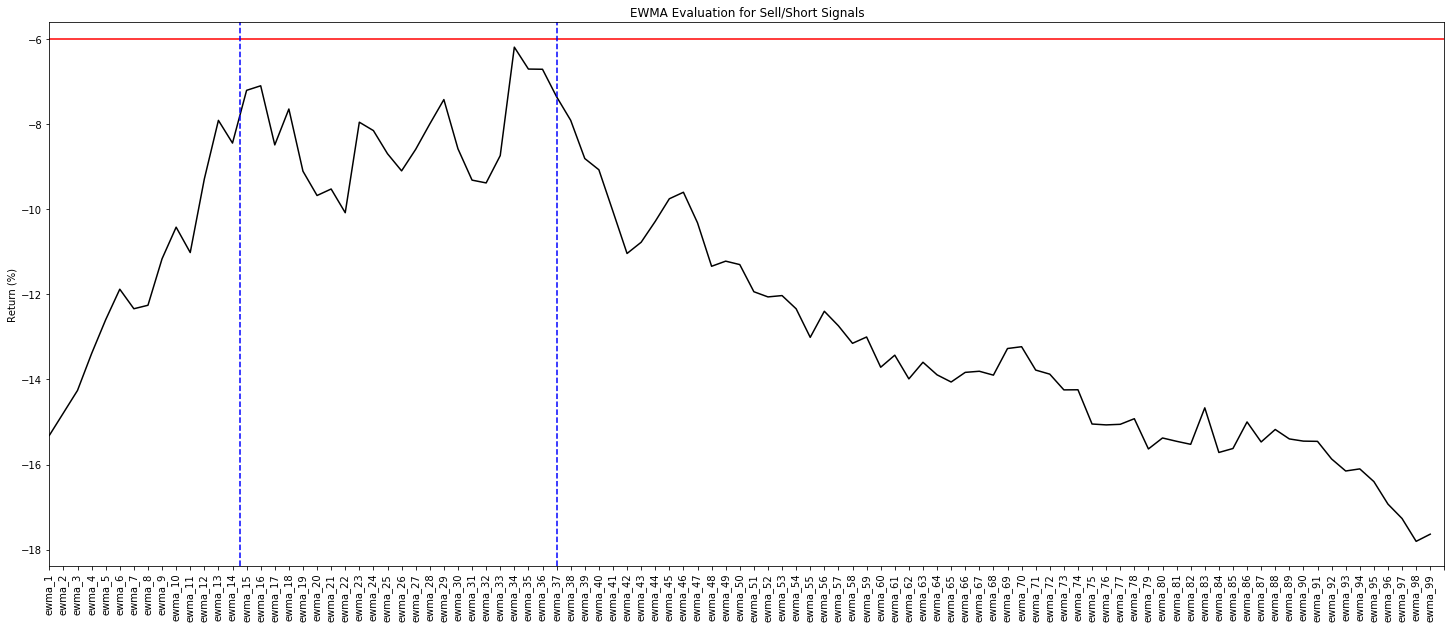

In [4]:
plt.figure(figsize=(25,10))
(sell.mean()*100).plot(color = "black")
plt.xticks(np.arange(0,100,1), sell.columns, rotation = 90)
plt.title("EWMA Evaluation for Sell/Short Signals")
plt.ylabel("Return (%)")

plt.axhline(y = -0.06*100, color = "r")
plt.axvline(x = 4.5 * 3, color = "blue", linestyle = "--")
plt.axvline(x = 12* 3, color = "blue", linestyle = "--")

#### Analysis of Previous Backtest

When we rank the strategies based on their average annualised returns, for the buy/long strategies, we can see there is a clear region between the EWMA(20/13) to EWMA(30/13) region which produces the highest absolute returns. The EWMA(60/13) region also offers relatively high returns, however, the large downward gap cautions us from using parameter windows near that region. 

For the sell/short strategies, the results are less clear, however, we can approximate a local maximum to fall between EWMA(15/13) to EWMA(35/13).

### Second Optimisation Search

Here we will refine our search over a narrower range which we defined from earlier above. This will help us pinpoint the exact strategy we should pursue.

In [5]:
# We will refine our search over a narrow window range
buy_search_range = range(20,31)
sell_search_range = range(15, 36)

[print(str(round((i/13), 1)) + " buy_days") for i in buy_search_range];
[print(str(round((i/13), 1)) + " sell_days") for i in sell_search_range];

1.5 buy_days
1.6 buy_days
1.7 buy_days
1.8 buy_days
1.8 buy_days
1.9 buy_days
2.0 buy_days
2.1 buy_days
2.2 buy_days
2.2 buy_days
2.3 buy_days
1.2 sell_days
1.2 sell_days
1.3 sell_days
1.4 sell_days
1.5 sell_days
1.5 sell_days
1.6 sell_days
1.7 sell_days
1.8 sell_days
1.8 sell_days
1.9 sell_days
2.0 sell_days
2.1 sell_days
2.2 sell_days
2.2 sell_days
2.3 sell_days
2.4 sell_days
2.5 sell_days
2.5 sell_days
2.6 sell_days
2.7 sell_days


Above we can see that our buy search range will be from 1.5 days to 2.3 days. Similarly, sell search range will range from 1.2 days to 2.7 days.

In [6]:
buy = ec.backtester(buy_search_range, "buy_only", save_csv=False)

In [7]:
sell = ec.backtester(sell_search_range, "sell_only", save_csv=False)

#### Analysis of Secondary Search

In [8]:
buy.sort_values("avg_metric", ascending=False).head()

,avg_metric,std_metric,avg_metric/std_metric,filter_counts,avg_port_cum_return,avg_holding_time_per_signal
EWMA(26/13),0.241911,0.399728,0.605189,44023.0,2.386445,0.855199
EWMA(27/13),0.237995,0.401709,0.592455,43853.0,2.379039,0.854001
EWMA(25/13),0.233465,0.388911,0.600304,44234.0,2.465070,0.855726
EWMA(28/13),0.229011,0.412959,0.554561,43715.0,2.370010,0.854420
EWMA(24/13),0.222213,0.388526,0.571939,44514.0,2.369048,0.856136


In [9]:
sell.sort_values("avg_metric", ascending=False).head()

,avg_metric,std_metric,avg_metric/std_metric,filter_counts,avg_port_cum_return,avg_holding_time_per_signal
EWMA(34/13),-0.061868,0.370070,-0.167179,38155.0,1.037381,0.841642
EWMA(35/13),-0.067018,0.366862,-0.182678,38089.0,1.020830,0.839637
EWMA(16/13),-0.070949,0.331329,-0.214136,45829.0,0.980252,0.869283
EWMA(15/13),-0.072019,0.339104,-0.212380,47023.0,0.994703,0.873439
EWMA(29/13),-0.074189,0.367428,-0.201915,38861.0,1.042396,0.844380


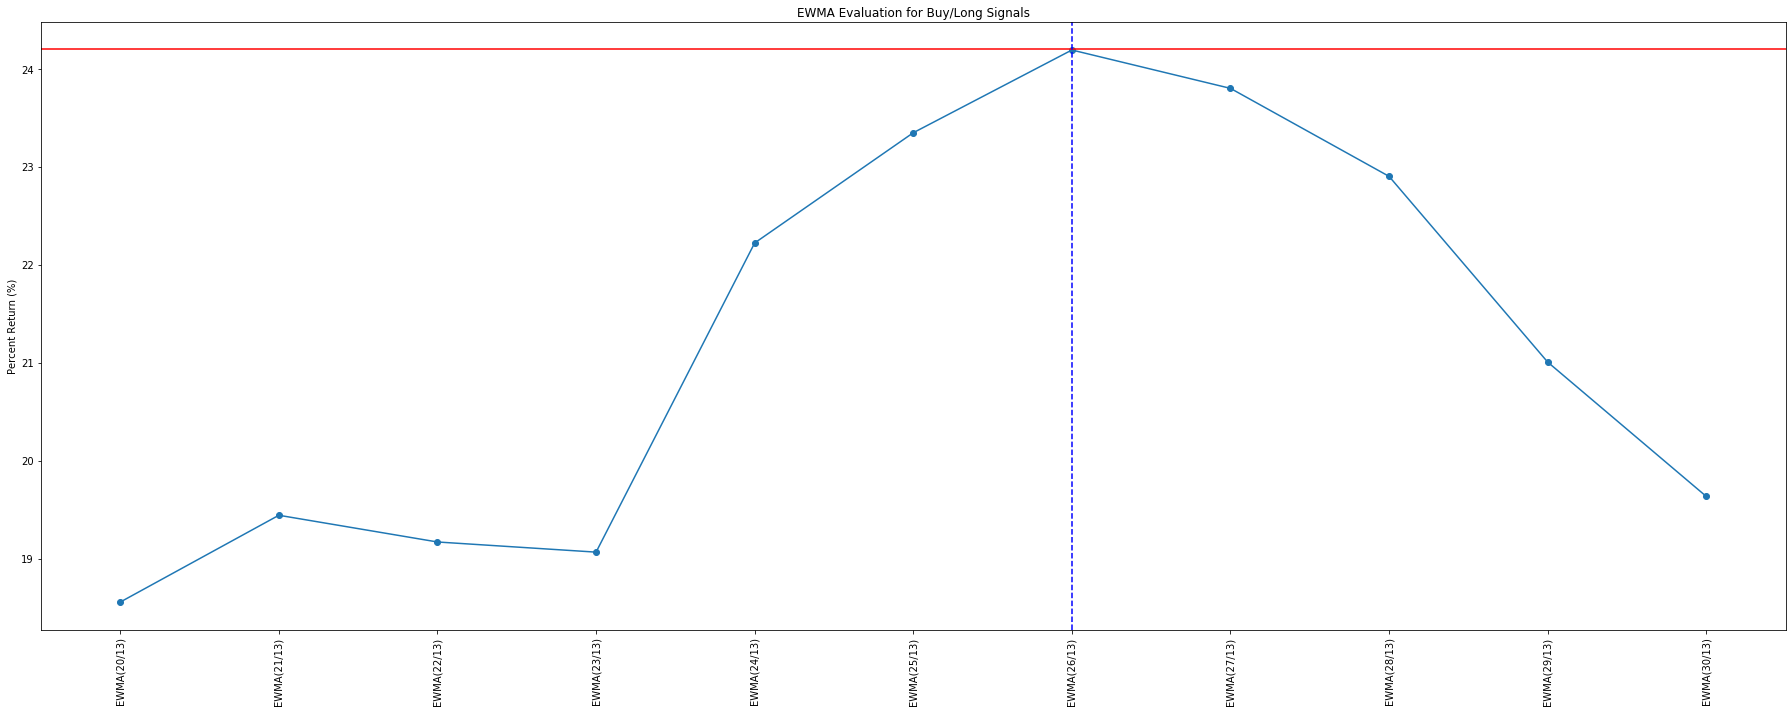

In [15]:
plt.figure(figsize=(25,10))
plt.plot(buy.index, buy.avg_metric*100, marker='o')
plt.title("EWMA Evaluation for Buy/Long Signals")
plt.ylabel("Percent Return (%)")
plt.xticks(rotation=90)
plt.axhline(y = 24.20, color = "r")
plt.axvline(x = 6 * 1, color = "blue", linestyle = "--")
plt.tight_layout()

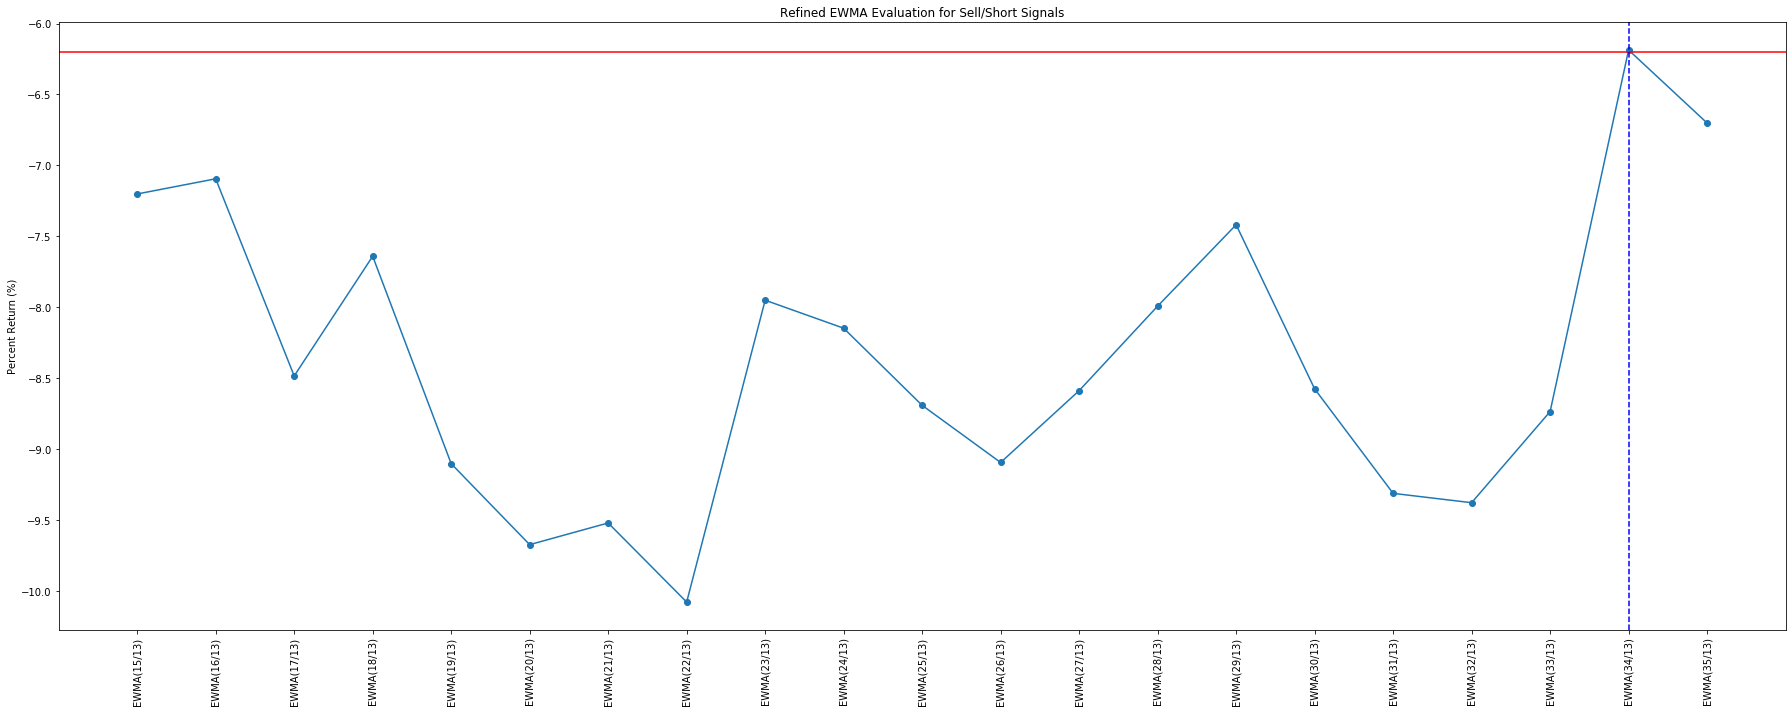

In [16]:
plt.figure(figsize=(25,10))
plt.plot(sell.index, sell.avg_metric*100, marker='o')
plt.title("Refined EWMA Evaluation for Sell/Short Signals")
plt.xticks(rotation = 90)
plt.ylabel("Percent Return (%)")
plt.tight_layout();

plt.axhline(y = -6.2, color = "r")
plt.axvline(x = 19 * 1, color = "blue", linestyle = "--")

Based on the plots above, we can see that after running our refined backtest, the EWMA(26/13) yields the greatest overall annualised return for the buy signals. Futhermore, the EWMA(34/13) window produces the greatest annualised return when looking at ony the sell/short signals. 

In [12]:
sell.sort_values('avg_metric', ascending=False).head(1).to_csv("../Output_strategy_statistics/ewma_top_sell.csv")
buy.sort_values('avg_metric', ascending=False).head(1).to_csv("../Output_strategy_statistics/ewma_top_buy.csv")